In [ ]:
import pandas as pd


In [ ]:
books_df = pd.read_csv('books-dataset-2.csv')

In [ ]:
books_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [ ]:
def search_books(keyword):
    keyword = keyword.lower()
    results = books_df[
        books_df['title'].str.lower().str.contains(keyword) |
        books_df['authors'].str.lower().str.contains(keyword) |
        books_df['publisher'].str.lower().str.contains(keyword)
    ]
    return results


In [ ]:
def display_books(books):
    #displayig the list of books
    if books.empty:
        print("No books found.")
    else:
        for index, book in books.iterrows():
            print(f"Title: {book['title']}")
            print(f"Author: {book['authors']}")
            print(f"Average Rating: {book['average_rating']}")
            print(f"ISBN: {book['isbn']}")
            print(f"ISBN13: {book['isbn13']}")
            print(f"Language: {book['language_code']}")
            if 'num_pages' in book:
                print(f"Number of Pages: {book['num_pages']}")
            print(f"Ratings Count: {book['ratings_count']}")
            print(f"Text Reviews Count: {book['text_reviews_count']}")
            print(f"Publication Date: {book['publication_date']}")
            print(f"Publisher: {book['publisher']}")
            print('-' * 40)

In [ ]:
if __name__ == "__main__":
    print("Welcome to the Book Recommendation Program!")
    keyword = input("Enter a keyword to search for books: ")
    results = search_books(keyword)
    display_books(results)


Welcome to the Book Recommendation Program!
Enter a keyword to search for books: Harry Potter
Title: Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Author: J.K. Rowling/Mary GrandPré
Average Rating: 4.57
ISBN: 439785960
ISBN13: 9.78044E+12
Language: eng
Ratings Count: 2095690
Text Reviews Count: 27591
Publication Date: 9/16/2006
Publisher: Scholastic Inc.
----------------------------------------
Title: Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Author: J.K. Rowling/Mary GrandPré
Average Rating: 4.49
ISBN: 439358078
ISBN13: 9.78044E+12
Language: eng
Ratings Count: 2153167
Text Reviews Count: 29221
Publication Date: 09-01-2004
Publisher: Scholastic Inc.
----------------------------------------
Title: Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Author: J.K. Rowling
Average Rating: 4.42
ISBN: 439554896
ISBN13: 9.78044E+12
Language: eng
Ratings Count: 6333
Text Reviews Count: 244
Publication Date: 11-01-2003
Publisher: Scholastic
-----------------

CNN demonstration

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass


In [ ]:

SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


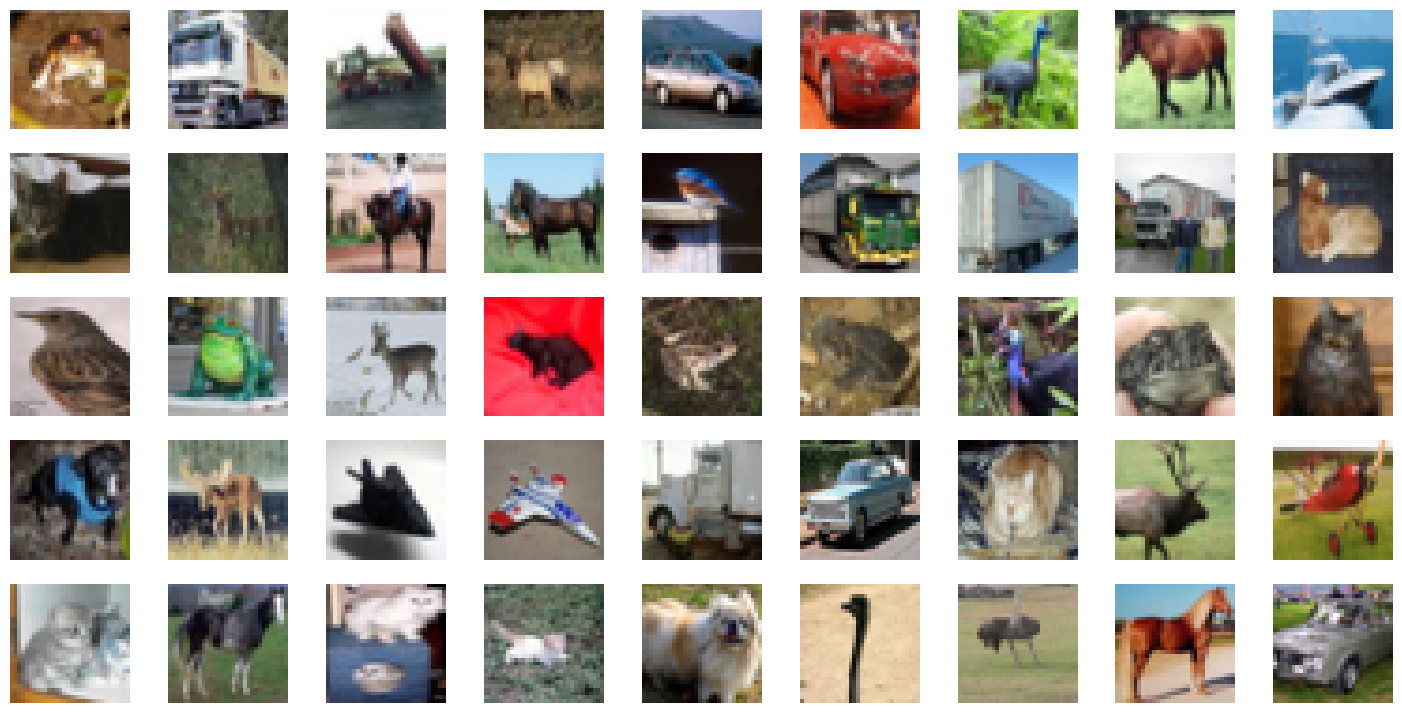

In [ ]:
plt.figure(figsize=(18, 9))

num_rows = 5
num_cols = 9
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

In [ ]:

# Normalizing the images
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# integer to categorical data.
print('Original (int) label for the first training sample is: ', y_train[0])

#one hot encoding
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion....to categorical one-hot encoded labels: ', y_train[0])

Original (int) label for the first training sample is:  [6]
After conversion....to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:

@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

def cnn_model(input_shape=(32, 32, 3)):
    model = Sequential()

    # Conv Block 1: 32 Filters, MaxPool.
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 2: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 3: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the convolutional features
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
model = cnn_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/31
137/137 [==============================] - 240s 2s/step - loss: 1.3421 - accuracy: 0.5198 - val_loss: 1.2898 - val_accuracy: 0.5371
Epoch 2/31
137/137 [==============================] - 238s 2s/step - loss: 1.1774 - accuracy: 0.5822 - val_loss: 1.0907 - val_accuracy: 0.6129
Epoch 3/31
137/137 [==============================] - 239s 2s/step - loss: 1.0475 - accuracy: 0.6277 - val_loss: 1.0677 - val_accuracy: 0.6253
Epoch 4/31
 31/137 [=====>........................] - ETA: 2:33 - loss: 0.9517 - accuracy: 0.6639

KeyboardInterrupt: 

In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

In [ ]:
#training results
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
def cnn_model_dropout(input_shape=(32, 32, 3)):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [ ]:
model_dropout.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'],
                     )


history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            epochs=TrainingConfig.EPOCHS,
                            verbose=1,
                            validation_split=.3,
                           )

Epoch 1/31
 21/137 [===>..........................] - ETA: 2:50 - loss: 2.2965 - accuracy: 0.1218

KeyboardInterrupt: 